<a href="https://colab.research.google.com/github/1-arjunsingh/iNeuron_ML/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [0]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

5


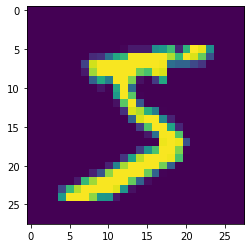

In [18]:

import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 0 
print(y_train[image_index]) 
plt.imshow(x_train[image_index])

# Upgrading TensorFlow

[TensorFlow](https://www.tensorflow.org/) is available by default but you can switch which version you're using.

In [19]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


In [6]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.2145 - accuracy: 0.9356
Epoch 2/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0841 - accuracy: 0.9744
Epoch 3/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0579 - accuracy: 0.9818
Epoch 4/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0446 - accuracy: 0.9854
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0358 - accuracy: 0.9879
Epoch 6/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0297 - accuracy: 0.9898
Epoch 7/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0251 - accuracy: 0.9915
Epoch 8/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0223 - accuracy: 0.9924
Epoch 9/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0207 - accuracy: 0.9930
Epoch 10/10
60000/60000 [============================

In [7]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 51us/step


[0.07542283320529769, 0.9830999970436096]

5


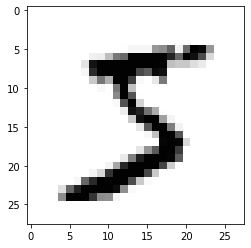

In [22]:

image_index = 0
plt.imshow(x_train[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_train[image_index].reshape(1, 28,28, 1))
print(pred.argmax())